In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/github-daily-trending-repos/github_daily_trending.csv


In [2]:
!ls

__notebook__.ipynb


In [3]:
df = pd.read_csv('/kaggle/input/github-daily-trending-repos/github_daily_trending.csv')
df.head()

,org_name,repo_name,repo_url,description,language,star,forks,daily_star,date,trending_category
0,terrastruct,d2,https://github.com/terrastruct/d2,D2 is a modern diagram scripting language that...,Go,17896.0,439.0,418,2024-11-17,go
1,tinygo-org,tinygo,https://github.com/tinygo-org/tinygo,Go compiler for small places. Microcontrollers...,Go,15463.0,912.0,6,2024-11-17,go
2,Melkeydev,go-blueprint,https://github.com/Melkeydev/go-blueprint,Go-blueprint allows users to spin up a quick G...,Go,4608.0,276.0,9,2024-11-17,go
3,jeessy2,ddns-go,https://github.com/jeessy2/ddns-go,"Simple and easy to use DDNS. Support Aliyun, T...",Go,12117.0,1398.0,25,2024-11-17,go
4,JanDeDobbeleer,oh-my-posh,https://github.com/JanDeDobbeleer/oh-my-posh,The most customisable and low-latency cross pl...,Go,17450.0,2390.0,16,2024-11-17,go


In [4]:
df.isna().sum()

org_name               0
repo_name              0
repo_url               0
description            0
language              65
star                 156
forks                156
daily_star             0
date                   0
trending_category      0
dtype: int64

In [5]:
df.describe()

,star,forks,daily_star
count,9634.000000,9634.000000,9790.000000
mean,23806.490243,3764.963048,75.632380
std,40278.796290,7595.988700,243.384987
min,23.000000,3.000000,0.000000
25%,4556.000000,499.000000,5.000000
50%,11988.000000,1349.000000,15.000000
75%,26317.750000,3573.000000,49.000000
max,408289.000000,78936.000000,8559.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9790 entries, 0 to 9789
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   org_name           9790 non-null   object 
 1   repo_name          9790 non-null   object 
 2   repo_url           9790 non-null   object 
 3   description        9790 non-null   object 
 4   language           9725 non-null   object 
 5   star               9634 non-null   float64
 6   forks              9634 non-null   float64
 7   daily_star         9790 non-null   int64  
 8   date               9790 non-null   object 
 9   trending_category  9790 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 765.0+ KB


<Axes: >

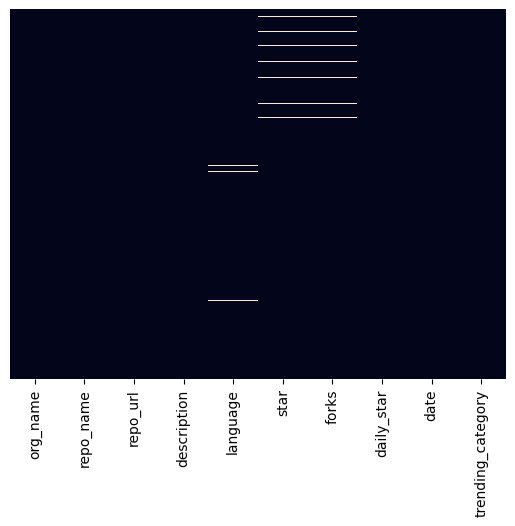

In [7]:
sns.heatmap(data=df.isna(), cbar=False, yticklabels=False)

In [8]:
df.columns

Index(['org_name', 'repo_name', 'repo_url', 'description', 'language', 'star',
       'forks', 'daily_star', 'date', 'trending_category'],
      dtype='object')

In [9]:
df.head()

,org_name,repo_name,repo_url,description,language,star,forks,daily_star,date,trending_category
0,terrastruct,d2,https://github.com/terrastruct/d2,D2 is a modern diagram scripting language that...,Go,17896.0,439.0,418,2024-11-17,go
1,tinygo-org,tinygo,https://github.com/tinygo-org/tinygo,Go compiler for small places. Microcontrollers...,Go,15463.0,912.0,6,2024-11-17,go
2,Melkeydev,go-blueprint,https://github.com/Melkeydev/go-blueprint,Go-blueprint allows users to spin up a quick G...,Go,4608.0,276.0,9,2024-11-17,go
3,jeessy2,ddns-go,https://github.com/jeessy2/ddns-go,"Simple and easy to use DDNS. Support Aliyun, T...",Go,12117.0,1398.0,25,2024-11-17,go
4,JanDeDobbeleer,oh-my-posh,https://github.com/JanDeDobbeleer/oh-my-posh,The most customisable and low-latency cross pl...,Go,17450.0,2390.0,16,2024-11-17,go


In [10]:
df['language'].unique()

array(['Go', 'Python', 'Rust', 'Ruby', 'Kotlin', 'Makefile',
       'Jupyter Notebook', 'TypeScript', 'Svelte', 'C', 'Markdown', 'C++',
       'C#', nan, 'Java', 'HTML', 'JavaScript', 'PHP', 'Shell', 'CSS',
       'MDX', 'Swift', 'Dart', 'Vue', 'LLVM', 'PowerShell', 'Blade',
       'Haskell', 'Zig', 'Lua', 'Elixir', 'PureScript', 'Scala'],
      dtype=object)

In [11]:
df.loc[df['language'] == 'Python']['description']

437     Learn how to design large-scale systems. Prep ...
438                               Stable Diffusion web UI
439                  Free, open source crypto trading bot
440             A recursive internet scanner for hackers.
441     The official gpt4free repository | various col...
                              ...                        
9656    A scalable generative AI framework built for r...
9657    OCR, layout analysis, reading order, table rec...
9658                     matplotlib: plotting with Python
9659    VILA is a family of state-of-the-art vision la...
9660    The leading data integration platform for ETL ...
Name: description, Length: 1337, dtype: object

In [12]:
df['language'].isna().sum()

65

In [13]:
duplicate_df = df.copy()
duplicate_df.head()

,org_name,repo_name,repo_url,description,language,star,forks,daily_star,date,trending_category
0,terrastruct,d2,https://github.com/terrastruct/d2,D2 is a modern diagram scripting language that...,Go,17896.0,439.0,418,2024-11-17,go
1,tinygo-org,tinygo,https://github.com/tinygo-org/tinygo,Go compiler for small places. Microcontrollers...,Go,15463.0,912.0,6,2024-11-17,go
2,Melkeydev,go-blueprint,https://github.com/Melkeydev/go-blueprint,Go-blueprint allows users to spin up a quick G...,Go,4608.0,276.0,9,2024-11-17,go
3,jeessy2,ddns-go,https://github.com/jeessy2/ddns-go,"Simple and easy to use DDNS. Support Aliyun, T...",Go,12117.0,1398.0,25,2024-11-17,go
4,JanDeDobbeleer,oh-my-posh,https://github.com/JanDeDobbeleer/oh-my-posh,The most customisable and low-latency cross pl...,Go,17450.0,2390.0,16,2024-11-17,go


In [14]:
duplicate_df.isna().sum()

org_name               0
repo_name              0
repo_url               0
description            0
language              65
star                 156
forks                156
daily_star             0
date                   0
trending_category      0
dtype: int64

### Fill NAN values 

In [15]:
fill_values = {'language':'unavailable language', 'star': df['star'].mean(), 'forks': df['forks'].mean()}
duplicate_df.fillna(fill_values, inplace=True)

In [16]:
duplicate_df['date']

0       2024-11-17
1       2024-11-17
2       2024-11-17
3       2024-11-17
4       2024-11-17
           ...    
9785    2025-01-08
9786    2025-01-08
9787    2025-01-08
9788    2025-01-08
9789    2025-01-08
Name: date, Length: 9790, dtype: object

### Convert Date column object to date_format using pd.to_datetime()

In [17]:
duplicate_df['date'] = pd.to_datetime(duplicate_df['date'], errors='coerce')


In [18]:
duplicate_df.isna().sum()

org_name             0
repo_name            0
repo_url             0
description          0
language             0
star                 0
forks                0
daily_star           0
date                 0
trending_category    0
dtype: int64

In [19]:
duplicate_df.head()

,org_name,repo_name,repo_url,description,language,star,forks,daily_star,date,trending_category
0,terrastruct,d2,https://github.com/terrastruct/d2,D2 is a modern diagram scripting language that...,Go,17896.0,439.0,418,2024-11-17,go
1,tinygo-org,tinygo,https://github.com/tinygo-org/tinygo,Go compiler for small places. Microcontrollers...,Go,15463.0,912.0,6,2024-11-17,go
2,Melkeydev,go-blueprint,https://github.com/Melkeydev/go-blueprint,Go-blueprint allows users to spin up a quick G...,Go,4608.0,276.0,9,2024-11-17,go
3,jeessy2,ddns-go,https://github.com/jeessy2/ddns-go,"Simple and easy to use DDNS. Support Aliyun, T...",Go,12117.0,1398.0,25,2024-11-17,go
4,JanDeDobbeleer,oh-my-posh,https://github.com/JanDeDobbeleer/oh-my-posh,The most customisable and low-latency cross pl...,Go,17450.0,2390.0,16,2024-11-17,go


<Axes: >

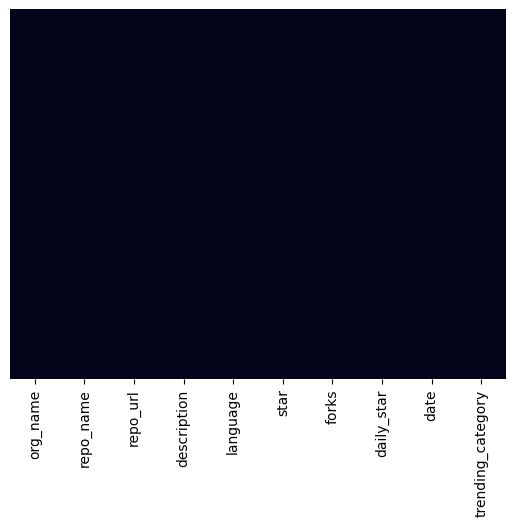

In [20]:
sns.heatmap(data=duplicate_df.isna(), cbar=False, yticklabels=False)

<Axes: title={'center': 'Trending Category Language'}, xlabel='count', ylabel='trending_category'>

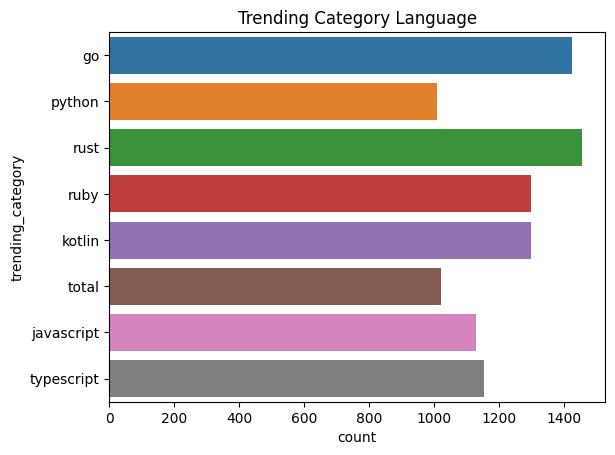

In [21]:
plt.title('Trending Category Language')
sns.countplot(y='trending_category', data=duplicate_df)

In [22]:
duplicate_df[duplicate_df['trending_category'] == 'python']

,org_name,repo_name,repo_url,description,language,star,forks,daily_star,date,trending_category
437,donnemartin,system-design-primer,https://github.com/donnemartin/system-design-p...,Learn how to design large-scale systems. Prep ...,Python,276079.0,46342.0,211,2024-11-17,python
438,AUTOMATIC1111,stable-diffusion-webui,https://github.com/AUTOMATIC1111/stable-diffus...,Stable Diffusion web UI,Python,142992.0,26951.0,63,2024-11-17,python
439,freqtrade,freqtrade,https://github.com/freqtrade/freqtrade,"Free, open source crypto trading bot",Python,29089.0,6208.0,24,2024-11-17,python
440,blacklanternsecurity,bbot,https://github.com/blacklanternsecurity/bbot,A recursive internet scanner for hackers.,Python,5680.0,464.0,209,2024-11-17,python
441,xtekky,gpt4free,https://github.com/xtekky/gpt4free,The official gpt4free repository | various col...,Python,61291.0,13327.0,18,2024-11-17,python
...,...,...,...,...,...,...,...,...,...,...
9656,NVIDIA,NeMo,https://github.com/NVIDIA/NeMo,A scalable generative AI framework built for r...,Python,12714.0,2588.0,62,2025-01-08,python
9657,VikParuchuri,surya,https://github.com/VikParuchuri/surya,"OCR, layout analysis, reading order, table rec...",Python,15285.0,987.0,49,2025-01-08,python
9658,matplotlib,matplotlib,https://github.com/matplotlib/matplotlib,matplotlib: plotting with Python,Python,20551.0,7699.0,5,2025-01-08,python
9659,NVlabs,VILA,https://github.com/NVlabs/VILA,VILA is a family of state-of-the-art vision la...,Python,2428.0,194.0,83,2025-01-08,python


In [23]:
duplicate_df.head()

,org_name,repo_name,repo_url,description,language,star,forks,daily_star,date,trending_category
0,terrastruct,d2,https://github.com/terrastruct/d2,D2 is a modern diagram scripting language that...,Go,17896.0,439.0,418,2024-11-17,go
1,tinygo-org,tinygo,https://github.com/tinygo-org/tinygo,Go compiler for small places. Microcontrollers...,Go,15463.0,912.0,6,2024-11-17,go
2,Melkeydev,go-blueprint,https://github.com/Melkeydev/go-blueprint,Go-blueprint allows users to spin up a quick G...,Go,4608.0,276.0,9,2024-11-17,go
3,jeessy2,ddns-go,https://github.com/jeessy2/ddns-go,"Simple and easy to use DDNS. Support Aliyun, T...",Go,12117.0,1398.0,25,2024-11-17,go
4,JanDeDobbeleer,oh-my-posh,https://github.com/JanDeDobbeleer/oh-my-posh,The most customisable and low-latency cross pl...,Go,17450.0,2390.0,16,2024-11-17,go


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


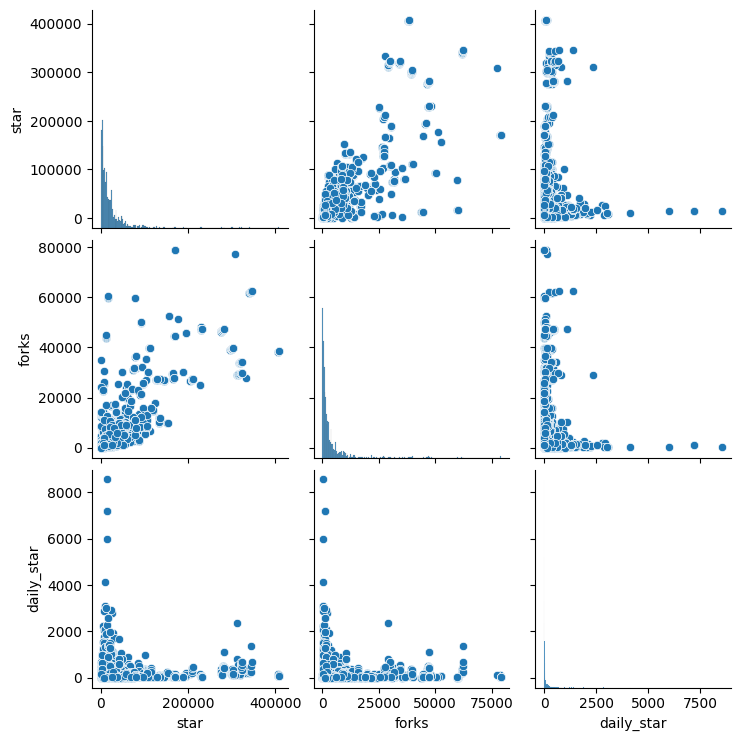

In [24]:
sns.pairplot(data=duplicate_df)

<Axes: xlabel='daily_star', ylabel='date'>

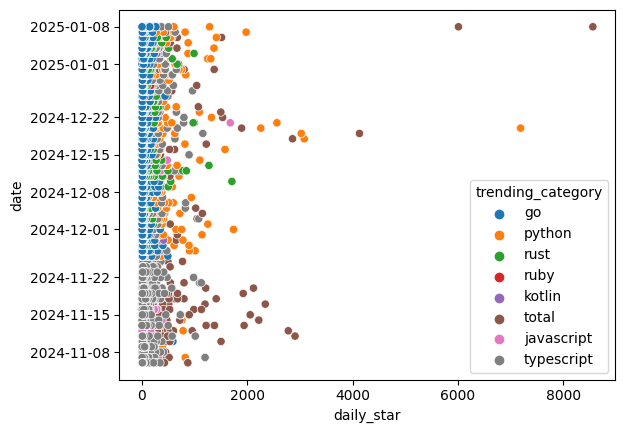

In [25]:
sns.scatterplot(data=duplicate_df, x='daily_star', y='date', hue='trending_category')

In [26]:
duplicate_df['date'].unique()

<DatetimeArray>
['2024-11-17 00:00:00', '2024-11-18 00:00:00', '2024-11-08 00:00:00',
 '2024-11-21 00:00:00', '2024-11-10 00:00:00', '2024-11-16 00:00:00',
 '2024-11-14 00:00:00', '2024-11-22 00:00:00', '2024-11-07 00:00:00',
 '2024-11-15 00:00:00', '2024-11-25 00:00:00', '2024-11-20 00:00:00',
 '2024-11-24 00:00:00', '2024-11-06 00:00:00', '2024-11-13 00:00:00',
 '2024-11-23 00:00:00', '2024-11-09 00:00:00', '2024-11-11 00:00:00',
 '2024-11-19 00:00:00', '2024-11-12 00:00:00', '2024-11-26 00:00:00',
 '2024-11-27 00:00:00', '2024-11-28 00:00:00', '2024-11-29 00:00:00',
 '2024-11-30 00:00:00', '2024-12-01 00:00:00', '2024-12-02 00:00:00',
 '2024-12-03 00:00:00', '2024-12-04 00:00:00', '2024-12-05 00:00:00',
 '2024-12-06 00:00:00', '2024-12-07 00:00:00', '2024-12-08 00:00:00',
 '2024-12-09 00:00:00', '2024-12-10 00:00:00', '2024-12-11 00:00:00',
 '2024-12-12 00:00:00', '2024-12-13 00:00:00', '2024-12-14 00:00:00',
 '2024-12-15 00:00:00', '2024-12-16 00:00:00', '2024-12-17 00:00:00',
 '20

In [27]:
duplicate_df['org_name'].unique()

array(['terrastruct', 'tinygo-org', 'Melkeydev', ..., 'ekzhang', 'pdfcpu',
       'anthdm'], dtype=object)

<Axes: >

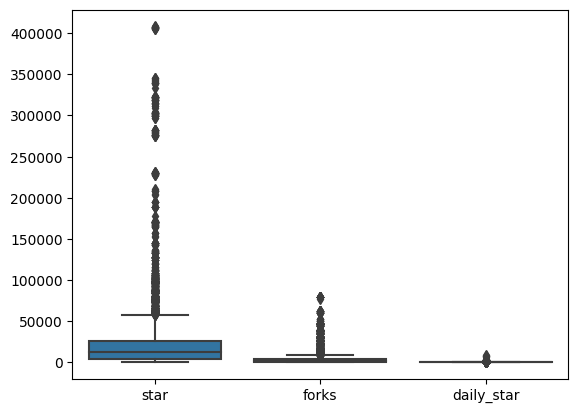

In [28]:
sns.boxplot(data=duplicate_df)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

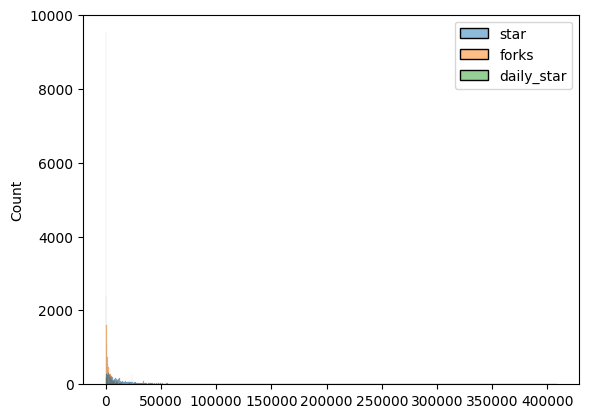

In [29]:
sns.histplot(data=duplicate_df)